In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

## Task 3: Loading the data

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url).drop(columns='Unnamed: 0') # remove redundant index

In [3]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Task 4: Descriptive statistics

<AxesSubplot:title={'center':'Median value of owner-occupied homes'}>

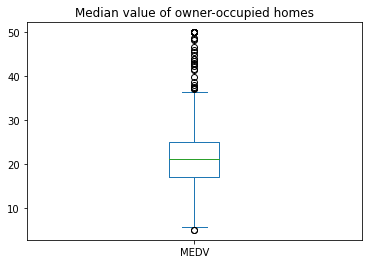

In [4]:
boston_df['MEDV'].plot.box(title='Median value of owner-occupied homes')

Median value of owner-occupied homes has a mean around 20 * $1000 and there are far more outliers of expensive homes rather than cheap ones.

<AxesSubplot:title={'center':'Charles river variable'}>

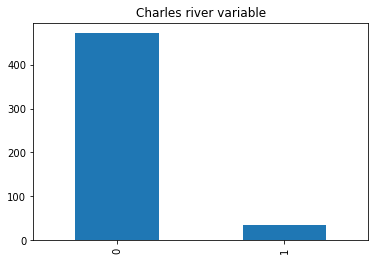

In [5]:
boston_df['CHAS'].astype(int).value_counts().plot.bar(title='Charles river variable')

Vast majority of houses does not tract Charles river.

[Text(0.5, 1.0, 'Median value of owner-occupied homes by age group')]

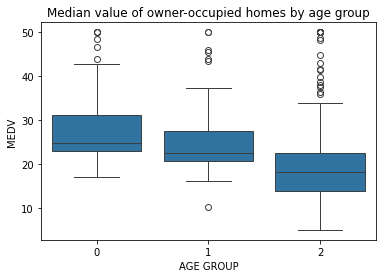

In [6]:
def age_to_group(age):
    if age < 35:
        return 0
    if 35 < age < 70:
        return 1
    if age > 70:
        return 2

age_medv_df = pd.DataFrame({
    'AGE GROUP': boston_df['AGE'].apply(age_to_group),
    'MEDV': boston_df['MEDV']
})

sns.boxplot(x="AGE GROUP", y="MEDV", data=age_medv_df).set(title='Median value of owner-occupied homes by age group')

Most homes are +70 y.o.

[Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')]

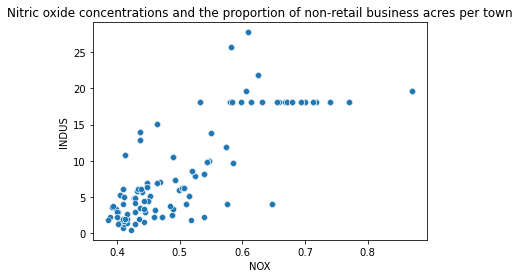

In [7]:
sns.scatterplot(data=boston_df, x="NOX", y="INDUS").set(title='Nitric oxide concentrations and the proportion of non-retail business acres per town')

There is a visible trend, growing NOX corresponds with growing INDUS

<AxesSubplot:title={'center':'Pupil-teacher ratio by town'}, ylabel='Frequency'>

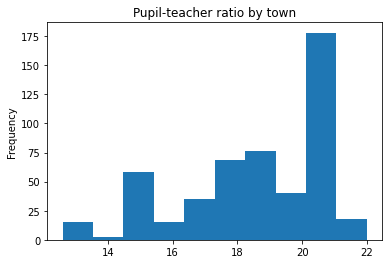

In [8]:
boston_df['PTRATIO'].plot.hist(title='Pupil-teacher ratio by town')

Most teachers have around 20 pupils

## Task 5: Tests

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis: There is no significant difference in means of MEDV.

In [9]:
houses_bounded = boston_df['MEDV'][boston_df['CHAS'] == 1]
houses_not_bounded = boston_df['MEDV'][boston_df['CHAS'] == 0]

stats.ttest_ind(houses_bounded, houses_not_bounded)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

pvalue < 0.05 - null hypothesis rejected. 

Houses that are bounded by the Charles river are more expensive in significant manner.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [10]:
stats.levene(
    age_medv_df[age_medv_df['AGE GROUP'] == 0]['MEDV'],
    age_medv_df[age_medv_df['AGE GROUP'] == 1]['MEDV'],
    age_medv_df[age_medv_df['AGE GROUP'] == 2]['MEDV'],
    center='mean'
)

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [11]:
stats.f_oneway(
    age_medv_df[age_medv_df['AGE GROUP'] == 0]['MEDV'],
    age_medv_df[age_medv_df['AGE GROUP'] == 1]['MEDV'],
    age_medv_df[age_medv_df['AGE GROUP'] == 2]['MEDV']
)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

p-value < 0.05 - null hypothesis rejected.

There is a differnce in median values of houses for each proportion of owner occupised units. 

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [12]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

p-value < 0.05 - null hypothesis rejected.


Statistic around 0.75 - indicating strong positive relation

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

I was unable to complete last exercise due to problem with dependecies but it would look more or less like this:

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


X = sm.add_constant(coboston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

ImportError: numpy.core.multiarray failed to import